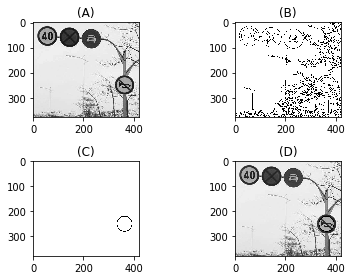

In [24]:
#直线检测
import cv2
from matplotlib import pyplot as plt 
import numpy as np

img=cv2.imread("../picture/sign.jpeg")
gray_img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
show_img=gray_img.copy()

#Canny的阈值
param1=50
param2=100

#Canny边缘检测边缘检测
edges = cv2.Canny(gray_img, param1, param2)
#对二值图像进行反转  黑白颠倒
edges=cv2.bitwise_not(edges)

#构造空白图像
clean_img=np.ones_like(show_img)

# 霍夫圆变换
circles = cv2.HoughCircles(gray_img,cv2.HOUGH_GRADIENT,1,
80,param1=param1,param2=param2,minRadius=20,maxRadius=60)

# 将检测的圆画出来
for i in circles[0, :]:
    cv2.circle(show_img, (i[0], i[1]), i[2], (0, 255, 0), 2)  
    cv2.circle(clean_img, (i[0], i[1]), i[2], (0, 255, 0), 2) 


plt.subplot(221)
plt.imshow(gray_img,cmap=plt.cm.gray) 
plt.title("(A)")

plt.subplot(222)
plt.imshow(edges,cmap=plt.cm.gray) 
plt.title("(B)")


plt.subplot(223)
plt.imshow(clean_img,cmap=plt.cm.gray) 
plt.title("(C)")

plt.subplot(224)
plt.imshow(show_img,cmap=plt.cm.gray) 
plt.title("(D)")


plt.tight_layout()